# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=qaanaaq
Processing Record 2 | Esna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=esna
Processing Record 3 | Ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=ambilobe
Processing Record 4 | Gull Lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=gull lake
Processing Record 5 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=thompson
Processing Record 6 | Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=nemuro
Processing Record 7 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 57 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=puerto ayora
Processing Record 58 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=kapaa
Processing Record 59 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=saint-pierre
Processing Record 60 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=pevek
Processing Record 61 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=airai
Processing Record 62 | Sabha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=sabha
Processing Record 63 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=norma

Processing Record 113 | Ambad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=ambad
Processing Record 114 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=provideniya
Processing Record 115 | Mahébourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=mahebourg
Processing Record 116 | Ulladulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=ulladulla
Processing Record 117 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=clyde river
Processing Record 118 | Tabas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=tabas
Processing Record 119 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385

Processing Record 168 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=albany
Processing Record 169 | Mondovì
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=mondovi
Processing Record 170 | Dickson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=dickson
Processing Record 171 | Yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=yeppoon
Processing Record 172 | Jiwani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=jiwani
City not found. Skipping...
Processing Record 173 | Evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=evensk
Processing Record 174 | Morro Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16d

Processing Record 223 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=yar-sale
Processing Record 224 | Saint-François
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=saint-francois
City not found. Skipping...
Processing Record 225 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=hambantota
Processing Record 226 | Hammerfest
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=hammerfest
Processing Record 227 | Uzhur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=uzhur
Processing Record 228 | Aipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=aipe
Processing Record 229 | Gigmoto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 278 | Bichura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=bichura
Processing Record 279 | Devils Lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=devils lake
Processing Record 280 | Ormara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=ormara
Processing Record 281 | Opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=opuwo
Processing Record 282 | Sakakah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=sakakah
City not found. Skipping...
Processing Record 283 | Nizhniy Odes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=nizhniy odes
Processing Record 284 | Zhengjiatun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 334 | Omsukchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=omsukchan
Processing Record 335 | Tongliao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=tongliao
Processing Record 336 | Zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=zhangye
Processing Record 337 | Inyonga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=inyonga
Processing Record 338 | Morondava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=morondava
Processing Record 339 | Tam Ky
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=tam ky
Processing Record 340 | Acapulco de Juárez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf

Processing Record 391 | Black Forest
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=black forest
Processing Record 392 | Ola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=ola
Processing Record 393 | Sungai Penuh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=sungaipenuh
Processing Record 394 | Dauriya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=dauriya
Processing Record 395 | Krasnosel'kup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=krasnoselkup
City not found. Skipping...
Processing Record 396 | Kochubey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=kochubey
City not found. Skipping...
Processing Record 397 | Şabyā
http://api.openweathermap.org/da

Processing Record 446 | Bindi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=bindi
Processing Record 447 | Chikwawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=chikwawa
Processing Record 448 | Cuamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=cuamba
Processing Record 449 | Erzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=erzin
Processing Record 450 | Shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=shenjiamen
City not found. Skipping...
Processing Record 451 | Aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=aquiraz
Processing Record 452 | Craig
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16d

Processing Record 503 | Alekseyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=alekseyevka
Processing Record 504 | Ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=ayan
City not found. Skipping...
Processing Record 505 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=coquimbo
Processing Record 506 | Ringkøbing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=ringkobing
Processing Record 507 | Tõrva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=torva
Processing Record 508 | Wenling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=wenling
City not found. Skipping...
Processing Record 509 | Maturin
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 559 | Tsabong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=tsabong
Processing Record 560 | Palizada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=palizada
Processing Record 561 | Bahraich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=bahraich
Processing Record 562 | Hong Kong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=victoria
Processing Record 563 | Biryusinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=biryusinsk
Processing Record 564 | La Ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf105385323&q=la ronge
Processing Record 565 | Amos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3757e6929920fda16da68cf1053853

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          581
Cloudiness    581
Country       581
Date          581
Humidity      581
Lat           581
Lng           581
Max Temp      581
Wind Speed    581
dtype: int64

In [15]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,98,GL,1595281546,72,77.48,-69.36,47.86,0.63
1,Esna,0,EG,1595281612,30,25.29,32.55,93.20,4.70
2,Ambilobe,0,MG,1595281613,78,-13.20,49.05,63.39,3.49
3,Gull Lake,40,CA,1595281614,72,50.10,-108.48,66.20,12.75
4,Thompson,75,CA,1595281549,29,55.74,-97.86,78.80,3.36


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

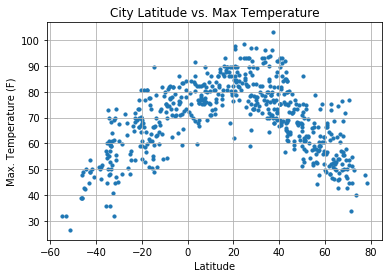

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

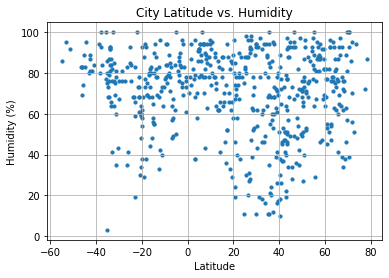

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

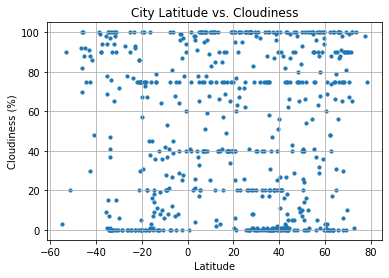

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

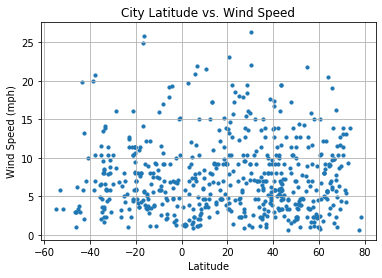

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot